# 2-D Scatter Plots with Wyvern Data
This notebook details how to produce 2-D scatter plots with Wyvern data.

## Getting started
- Ensure you have installed Anaconda/Conda
- Build the environment for this notebook using the following command:
  ```
   conda env create -f environment.yml
  ```
- Run this notebook in your tool of choice (Jupyter Lab, Visual Studio Code, etc), making sure you run it with the conda environment you just created!

In [2]:
# First, let's import our required packages
import requests 
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [1]:
# Feel free to modify the image that is downloaded in this section
IMAGE_TO_DOWNLOAD = "https://wyvern-prod-public-open-data-program.s3.ca-central-1.amazonaws.com/wyvern_dragonette-001_20240930T070744_08fd7f5a/wyvern_dragonette-001_20240930T070744_08fd7f5a.tiff"
LOCAL_FILE_NAME = "wyvern_dragonette-001_20240930T070744_08fd7f5a.tiff"
NAN_VALUE = -9999  # Default NaN value for Wyvern L1B geotiffs

In [ ]:
# We're going to use the Python Requests library to download our image. Since it's a large image,
# We'll use streaming/chunking to write the file directly to disk instead of holding it in memory.
# Feel free to not run this cell if you have already downloaded the data.
with requests.get(IMAGE_TO_DOWNLOAD, stream=True) as r:
    r.raise_for_status()
    with open(LOCAL_FILE_NAME, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192): 
            f.write(chunk)

In [3]:
# Now, let's load in our downloaded image & print some metadata about the image.
image_file = rasterio.open(LOCAL_FILE_NAME)
image_arr = image_file.read()

# Replace -9999 w/ NaNs
image_arr = np.where(image_arr == NAN_VALUE, np.nan, image_arr)

print(f"Image shape: {image_arr.shape}")
print(f"Image bands: {', '.join(image_file.descriptions)}")

Image shape: (23, 8271, 6013)
Image bands: Band_503, Band_510, Band_519, Band_535, Band_549, Band_570, Band_584, Band_600, Band_614, Band_635, Band_649, Band_660, Band_669, Band_679, Band_690, Band_699, Band_711, Band_722, Band_734, Band_750, Band_764, Band_782, Band_799


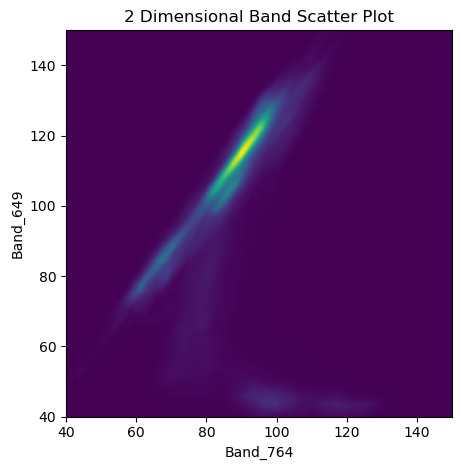

In [31]:
# Now, we're ready to plot some band combinations!
X_IDX = 20
Y_IDX = 10

band_x = image_arr[X_IDX].ravel()
band_y = image_arr[Y_IDX].ravel()

band_x = band_x[~np.isnan(band_x)]
band_y = band_y[~np.isnan(band_y)]

heatmap, xedges, yedges = np.histogram2d(band_x, band_y, bins=200, range=[[40, 150], [40, 150]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap="viridis")
plt.xlabel(image_file.descriptions[X_IDX])
plt.ylabel(image_file.descriptions[Y_IDX])
plt.title("2 Dimensional Band Scatter Plot")
plt.tight_layout()
plt.show()

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)